# Random Forests: Ensemble Learning

## Introduction

Random Forests are an **ensemble learning method** that combines multiple decision trees to create a more robust and accurate model.

This notebook explores:
- How Random Forests overcome the overfitting problem of single decision trees
- The key sources of randomness that make the method work
- Random Forests for classification and regression
- Feature importance analysis
- Hyperparameters and best practices

**Prerequisites:** Understanding of decision trees (see [decision_tree.ipynb](decision_tree.ipynb))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

## Random Forests: Ensemble Learning


### Introduction to Random Forests

As we saw earlier, decision trees have a major limitation: they tend to **overfit** the training data, especially when allowed to grow deep. A single decision tree has **high variance** - small changes in the training data can result in very different tree structures.

**Random Forests** solve this problem using an **ensemble learning** technique. Instead of relying on a single decision tree, Random Forests build many trees and combine their predictions. This is based on the principle that "the wisdom of the crowd" is often more accurate than any individual.

**Key idea:** Train multiple decision trees on different random subsets of the data and features, then aggregate their predictions:
- **Classification:** Use majority voting (the class that receives the most votes)
- **Regression:** Average the predictions of all trees

This approach dramatically reduces overfitting while maintaining the interpretability benefits of decision trees.


### How Random Forests Work

Random Forests use two key sources of randomness to create diverse trees:

1. **Bootstrap Aggregating (Bagging):**
   - Each tree is trained on a random sample of the training data (with replacement)
   - This is called bootstrap sampling
   - Typically, each sample contains about 63% of the original data

2. **Random Feature Selection:**
   - At each split in a tree, only a random subset of features is considered
   - This ensures trees are different from each other
   - Typical values: $\sqrt{n_{features}}$ for classification, $n_{features}/3$ for regression

**Algorithm steps:**
1. Create N bootstrap samples from the training data
2. For each sample, train a decision tree:
   - At each node, select a random subset of features
   - Choose the best split from this subset
3. To make a prediction:
   - Classification: Each tree votes, majority wins
   - Regression: Average all tree predictions

![Random Forest Illustration](./img/random_forest.png)


### Random Forest for Classification


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Using the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a single decision tree
single_tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

# Train a Random Forest with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

# Compare predictions
tree_pred = single_tree.predict(X_test)
rf_pred = rf_classifier.predict(X_test)

print("Single Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred, target_names=iris.target_names))


Single Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0

Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Random Forest for Regression

Let's compare a single regression tree with a Random Forest on the salary dataset:


/home/avidaldo/TRABAJO/wip-clase/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
/home/avidaldo/TRABAJO/wip-clase/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


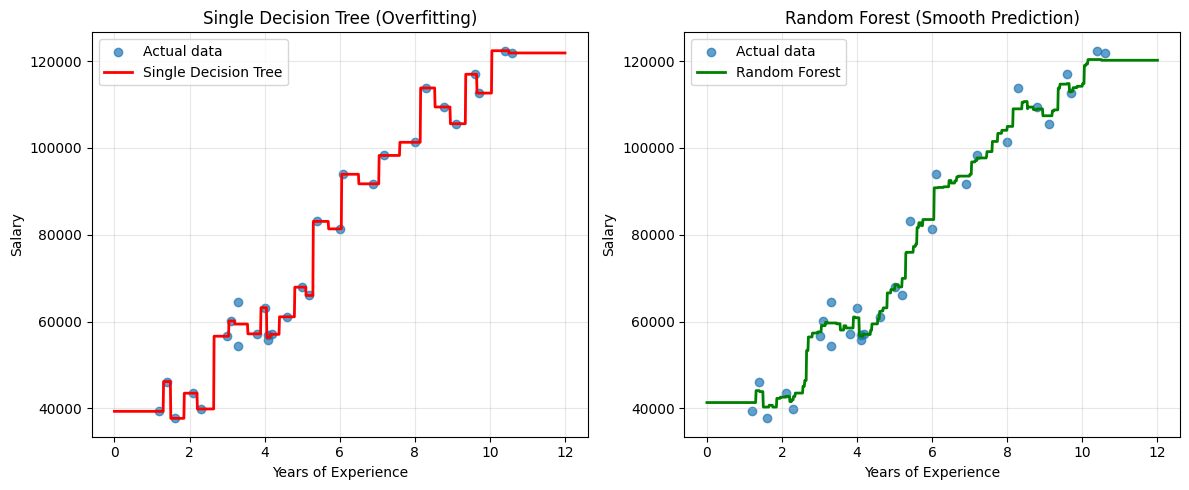

Single Tree - MSE: 1689209.48, R²: 0.9977
Random Forest - MSE: 6932913.11, R²: 0.9905


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load salary data
df = pd.read_csv("data/salaries.csv")

# Train models
tree_reg_full = DecisionTreeRegressor(random_state=42).fit(df[["YearsExperience"]], df["Salary"])
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42).fit(df[["YearsExperience"]], df["Salary"])

# Create prediction points
x_plot = np.linspace(0, 12, 1000)
tree_predictions = tree_reg_full.predict(x_plot.reshape(-1, 1))
rf_predictions = rf_regressor.predict(x_plot.reshape(-1, 1))

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['YearsExperience'], df['Salary'], label='Actual data', alpha=0.7)
plt.plot(x_plot, tree_predictions, color='red', label='Single Decision Tree', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Single Decision Tree (Overfitting)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(df['YearsExperience'], df['Salary'], label='Actual data', alpha=0.7)
plt.plot(x_plot, rf_predictions, color='green', label='Random Forest', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Random Forest (Smooth Prediction)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare metrics
train_pred_tree = tree_reg_full.predict(df[["YearsExperience"]])
train_pred_rf = rf_regressor.predict(df[["YearsExperience"]])

print(f"Single Tree - MSE: {mean_squared_error(df['Salary'], train_pred_tree):.2f}, R²: {r2_score(df['Salary'], train_pred_tree):.4f}")
print(f"Random Forest - MSE: {mean_squared_error(df['Salary'], train_pred_rf):.2f}, R²: {r2_score(df['Salary'], train_pred_rf):.4f}")


Notice how the Random Forest produces a much smoother prediction curve compared to the jagged overfitted curve of a single decision tree!


### Feature Importance

One of the great advantages of Random Forests is that they can tell us which features are most important for making predictions. This is calculated by measuring how much each feature decreases the impurity (Gini or entropy) across all trees.


Feature Importance:
             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


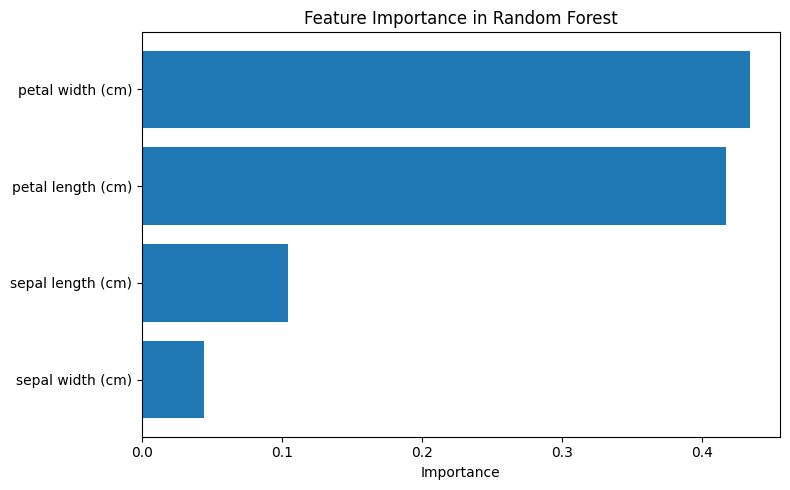

In [ ]:
# Feature importance for the iris classification
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_classifier.feature_importances_
feature_names = iris.feature_names

# Create a dataframe for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Visualize
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Important Hyperparameters

Random Forests have several hyperparameters that can be tuned:

| Parameter | Description | Default | Impact |
|-----------|-------------|---------|--------|
| `n_estimators` | Number of trees in the forest | 100 | More trees = better performance but slower. Usually 100-500 is good |
| `max_depth` | Maximum depth of each tree | None (unlimited) | Controls overfitting. Lower values prevent overfitting |
| `min_samples_split` | Min samples required to split a node | 2 | Higher values prevent overfitting |
| `min_samples_leaf` | Min samples required in a leaf node | 1 | Higher values create smoother models |
| `max_features` | Max features to consider per split | 'sqrt' (classification)<br>'1.0' (regression) | Lower values increase diversity between trees |
| `random_state` | Seed for reproducibility | None | Set to a number for reproducible results |
| `n_jobs` | Number of CPU cores to use | None (1 core) | Set to -1 to use all available cores |


### Advantages and Disadvantages of Random Forests

**Advantages:**
- **Reduces overfitting:** By averaging multiple trees, variance is reduced significantly
- **High accuracy:** Often achieves excellent performance out-of-the-box
- **Handles missing data:** Can maintain accuracy even with missing values
- **Works with both categorical and numerical features:** Minimal preprocessing required
- **Feature importance:** Provides insights into which features matter most
- **Robust to outliers:** Individual trees may overfit outliers, but ensemble averages them out
- **Parallelizable:** Trees can be trained independently on multiple CPU cores

**Disadvantages:**
- **Less interpretable:** Cannot visualize hundreds of trees like a single tree
- **Slower prediction:** Must aggregate predictions from many trees
- **Larger model size:** Requires storing multiple trees in memory
- **Not ideal for extrapolation:** Cannot predict beyond the range of training data
- **Can overfit noisy data:** If trees are too deep and dataset is very noisy


### Summary: Decision Trees vs. Random Forests

| Aspect | Single Decision Tree | Random Forest |
|--------|---------------------|---------------|
| **Model type** | Single model | Ensemble of models |
| **Overfitting** | High tendency to overfit | Reduced overfitting |
| **Variance** | High variance | Low variance |
| **Bias** | Low bias (if deep) | Slightly higher bias |
| **Interpretability** | Highly interpretable | Less interpretable |
| **Training time** | Fast | Slower (trains multiple trees) |
| **Prediction time** | Very fast | Slower (aggregates predictions) |
| **Accuracy** | Lower (especially on test data) | Higher (more robust) |
| **When to use** | Need interpretability, small dataset | Need accuracy, can afford computation |

**Key Takeaway:** Random Forests trade some interpretability and speed for significantly better generalization and accuracy. They are one of the most powerful and widely-used machine learning algorithms in practice.


### Additional Resources on Random Forests

- [Random Forests - Scikit-learn Documentation](https://scikit-learn.org/stable/modules/ensemble.html#forest)
- [StatQuest: Random Forests Part 1 - Building, Using and Evaluating](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)
- [StatQuest: Random Forests Part 2 - Missing Data and Clustering](https://www.youtube.com/watch?v=sQ870aTKqiM)
- Original paper: Breiman, L. (2001). "Random Forests". Machine Learning. 45 (1): 5–32.
